In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from lifestore_file import lifestore_products, lifestore_sales, lifestore_searches

In [3]:
#Se convierten a DataFrame las listas
pd_products = pd.DataFrame(lifestore_products, columns=['id_product', 'name', 'price', 'category', 'stock'])

pd_searches = pd.DataFrame(lifestore_searches, columns=['id_search', 'id product'])

pd_sales = pd.DataFrame(lifestore_sales, columns =['id_sale', 'id_product', 'score', 'date', 'refund'])
#score (from 1 to 5)
#refund (1 for true or 0 to false)

# Venta de productos

In [4]:
#Se contabilizará el número de ventas por producto
#Se contabilizará el número de devoluciones por producto
#Se calculará el número de ventas reales = ventas-devoluciones
No_prods = len(pd_products['id_product'])#Se obtiene la cantidad de productos diferentes
n_vent = np.zeros(No_prods)              #Se crea un vector donde se almacenará el número de ventas por producto
n_dev = np.zeros(No_prods)               #Se crea un vector donde se almacenará el número de devoluciones por producto
for i in range(len(pd_sales)):
    #Se registra el número de compras por productos
    n_vent[pd_sales['id_product'][i]-1] += 1
    #Se registra el número de devoluciones por productos
    if pd_sales['refund'][i] == 1:
        n_dev[pd_sales['id_product'][i]-1] += 1

#Se calculan las ventas reales
n_vent_tot = n_vent - n_dev

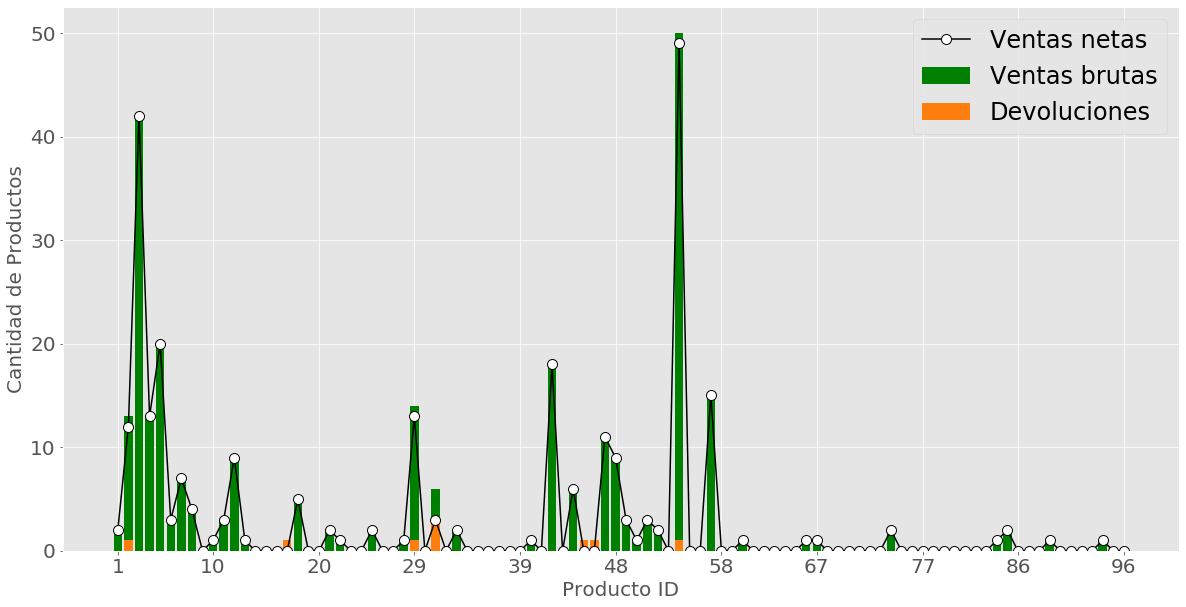

In [5]:
##############################################################
# Se grafican las ventas brutas, devoluciones y ventas netas #
##############################################################

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

x = [i+1 for i in range(len(pd_products))]
plt.bar(x, n_vent, color='green', label='Ventas brutas')
plt.bar(x, n_dev, color='tab:orange', label='Devoluciones')
plt.plot(x, n_vent_tot, '-o', color='black', mfc='white', markersize=10, label='Ventas netas')

plt.xlabel('Producto ID', fontsize=20)
plt.ylabel('Cantidad de Productos', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

nsticks=10
x = np.array([int((len(pd_products)-1)/nsticks*i+1) for i in range(nsticks+1)])
my_xticks = [i for i in x]
plt.xticks(x, my_xticks)
#plt.gcf().autofmt_xdate()

plt.legend(loc='best', fontsize=24)

In [6]:
#Se ordena el arreglo de cantidad vendida neta
n_vent_sort = sorted(n_vent_tot, reverse=True)

In [7]:
No_prod_vent = 5     #Se especifica la cantidad de productos con mayores ventas a mostrar en el listado

data_mv = []#Se crea un array

#Se utilizan while en lugar de for para considerar los casos de productos con misma cantidad de ventas
i = 0; j = 0
while i+j <= No_prod_vent:
    position = np.where(n_vent_tot==n_vent_sort[i])
    j = 0
    while j < len(position[0]) and j+i < No_prod_vent:
        data_mv.append([pd_products['id_product'][position[0][j]], pd_products['name'][position[0][j]], pd_products['category'][position[0][j]], n_vent_sort[i]])
        j+=1
    i+=1

#Se convierte en DataFrame para lucir la tabla jejeje
pd_mv = pd.DataFrame(data_mv, columns=['ID', 'Nombre', 'Categoría', 'Número de ventas'], index=[i+1 for i in range(No_prod_vent)])


In [8]:
print("\033[1m" + 'Productos con mayores ventas:' + "\033[0m")
pd_mv

Productos con mayores ventas:


,ID,Nombre,Categoría,Número de ventas
1,54,"SSD Kingston A400, 120GB, SATA III, 2.5'', 7mm",discos duros,49.0
2,3,"Procesador AMD Ryzen 5 2600, S-AM4, 3.40GHz, S...",procesadores,42.0
3,5,"Procesador Intel Core i3-9100F, S-1151, 3.60GH...",procesadores,20.0
4,42,Tarjeta Madre ASRock Micro ATX B450M Steel Leg...,tarjetas madre,18.0
5,57,"SSD Adata Ultimate SU800, 256GB, SATA III, 2.5...",discos duros,15.0


In [9]:
print("\033[1m" + 'Productos con mayores ventas:' + "\033[0m")
print('ID\tCategoría\tNúmero de ventas\tNombre')
for idx in range(len(pd_mv)):
    id_ = pd_mv.iloc[idx, 0]
    nombre = pd_mv.iloc[idx, 1]
    categoria = pd_mv.iloc[idx, 2]
    noventas = pd_mv.iloc[idx, 3]
    print(f'{id_}\t{categoria}\t{noventas}\t{nombre}')

Productos con mayores ventas:
ID	Categoría	Número de ventas	Nombre
54	discos duros	49.0	SSD Kingston A400, 120GB, SATA III, 2.5'', 7mm
3	procesadores	42.0	Procesador AMD Ryzen 5 2600, S-AM4, 3.40GHz, Six-Core, 16MB L3 Cache, con Disipador Wraith Stealth
5	procesadores	20.0	Procesador Intel Core i3-9100F, S-1151, 3.60GHz, Quad-Core, 6MB Cache (9na. Generación - Coffee Lake)
42	tarjetas madre	18.0	Tarjeta Madre ASRock Micro ATX B450M Steel Legend, S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD
57	discos duros	15.0	SSD Adata Ultimate SU800, 256GB, SATA III, 2.5'', 7mm


# Búsqueda de productos

In [10]:
#Se contabilizará el número de búsquedas por producto
No_prods = len(pd_products['id_product'])#Se obtiene la cantidad de productos diferentes
n_busq = np.zeros(No_prods)              #Se crea un vector donde se almacenará el número de búsquedas por producto

for i in range(len(pd_searches)):
    #Se registra el número de búsquedas por productos
    n_busq[pd_searches['id product'][i]-1] += 1

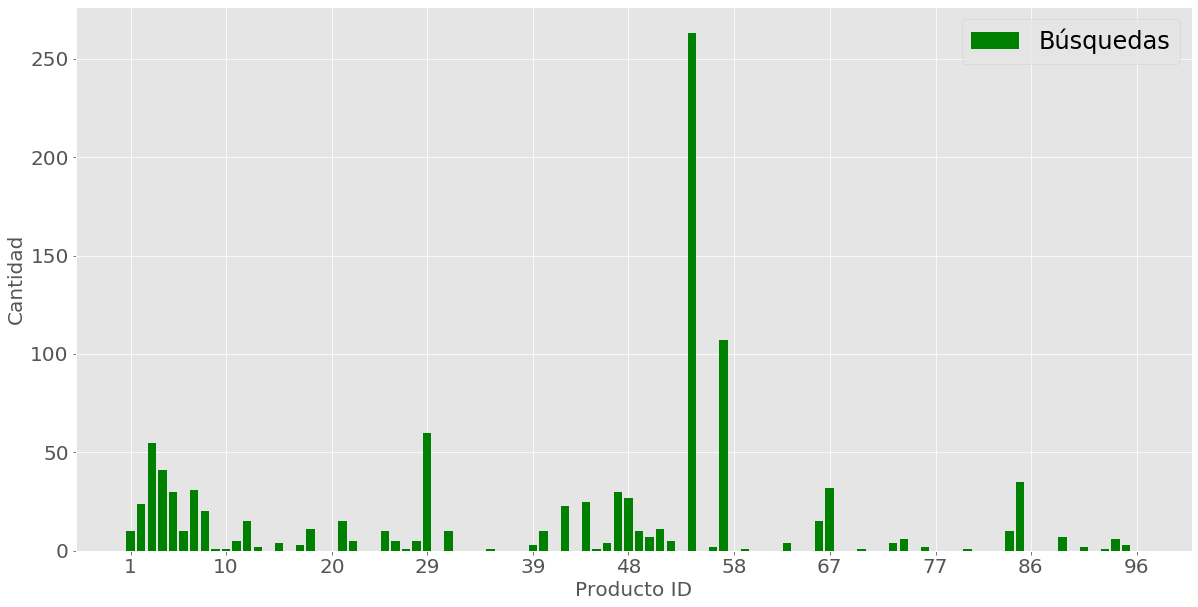

In [11]:
##############################################################
################# Se grafican las búsquedas  #################
##############################################################

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))
# fig, ax1 = plt.subplots(figsize=(20,10))


x = [i+1 for i in range(len(pd_products))]
plt.bar(x, n_busq, color='green', label='Búsquedas')

plt.xlabel('Producto ID', fontsize=20)
plt.ylabel('Cantidad', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


nsticks=10
x = np.array([int((len(pd_products)-1)/nsticks*i+1) for i in range(nsticks+1)])
my_xticks = [i for i in x]
plt.xticks(x, my_xticks)
#plt.gcf().autofmt_xdate()

plt.legend(loc='best', fontsize=24)

In [12]:
##Se ordena el arreglo de búsquedas por producto
n_busq_sort = sorted(n_busq, reverse=True)

In [13]:
No_prod_busq = 10    #Se especifica la cantidad de productos con mayores búsquedas a mostrar en el listado

data_ms = []#Se crea un array

#Se utilizan while en lugar de for para considerar los casos de productos con misma cantidad de ventas
i = 0; j = 0
while i+j <= No_prod_busq:
    position = np.where(n_busq==n_busq_sort[i])
    j = 0
    while j < len(position[0]) and j+i < No_prod_busq:
        data_ms.append([pd_products['id_product'][position[0][j]], pd_products['name'][position[0][j]], pd_products['category'][position[0][j]], n_busq_sort[i]])
        j+=1
    i+=1

#Se convierte en DataFrame para lucir la tabla jejeje
pd_ms = pd.DataFrame(data_ms, columns=['ID', 'Nombre', 'Categoría', 'Número de búsquedas'], index=[i+1 for i in range(No_prod_busq)])


In [14]:
print("\033[1m" + 'Productos con mayores búsquedas:' + "\033[0m")
pd_ms

Productos con mayores búsquedas:


,ID,Nombre,Categoría,Número de búsquedas
1,54,"SSD Kingston A400, 120GB, SATA III, 2.5'', 7mm",discos duros,263.0
2,57,"SSD Adata Ultimate SU800, 256GB, SATA III, 2.5...",discos duros,107.0
3,29,Tarjeta Madre ASUS micro ATX TUF B450M-PLUS GA...,tarjetas madre,60.0
4,3,"Procesador AMD Ryzen 5 2600, S-AM4, 3.40GHz, S...",procesadores,55.0
5,4,Procesador AMD Ryzen 3 3200G con Gráficos Rade...,procesadores,41.0
6,85,"Logitech Audífonos Gamer G635 7.1, Alámbrico, ...",audifonos,35.0
7,67,"TV Monitor LED 24TL520S-PU 24, HD, Widescreen,...",pantallas,32.0
8,7,"Procesador Intel Core i7-9700K, S-1151, 3.60GH...",procesadores,31.0
9,5,"Procesador Intel Core i3-9100F, S-1151, 3.60GH...",procesadores,30.0
10,47,"SSD XPG SX8200 Pro, 256GB, PCI Express, M.2",discos duros,30.0


In [15]:
print("\033[1m" + 'Productos con mayores búsquedas:' + "\033[0m")
print('ID\tCategoría\tNúmero de ventas\tNombre')
for idx in range(len(pd_ms)):
    id_ = pd_ms.iloc[idx, 0]
    nombre = pd_ms.iloc[idx, 1]
    categoria = pd_ms.iloc[idx, 2]
    nobusq = pd_ms.iloc[idx, 3]
    print(f'{id_}\t{categoria}\t{nobusq}\t{nombre}')

Productos con mayores búsquedas:
ID	Categoría	Número de ventas	Nombre
54	discos duros	263.0	SSD Kingston A400, 120GB, SATA III, 2.5'', 7mm
57	discos duros	107.0	SSD Adata Ultimate SU800, 256GB, SATA III, 2.5'', 7mm
29	tarjetas madre	60.0	Tarjeta Madre ASUS micro ATX TUF B450M-PLUS GAMING, S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD
3	procesadores	55.0	Procesador AMD Ryzen 5 2600, S-AM4, 3.40GHz, Six-Core, 16MB L3 Cache, con Disipador Wraith Stealth
4	procesadores	41.0	Procesador AMD Ryzen 3 3200G con Gráficos Radeon Vega 8, S-AM4, 3.60GHz, Quad-Core, 4MB L3, con Disipador Wraith Spire
85	audifonos	35.0	Logitech Audífonos Gamer G635 7.1, Alámbrico, 1.5 Metros, 3.5mm, Negro/Azul
67	pantallas	32.0	TV Monitor LED 24TL520S-PU 24, HD, Widescreen, HDMI, Negro
7	procesadores	31.0	Procesador Intel Core i7-9700K, S-1151, 3.60GHz, 8-Core, 12MB Smart Cache (9na. Generación Coffee Lake)
5	procesadores	30.0	Procesador Intel Core i3-9100F, S-1151, 3.60GHz, Quad-Core, 6MB Cache (9na. Generación - Coffee

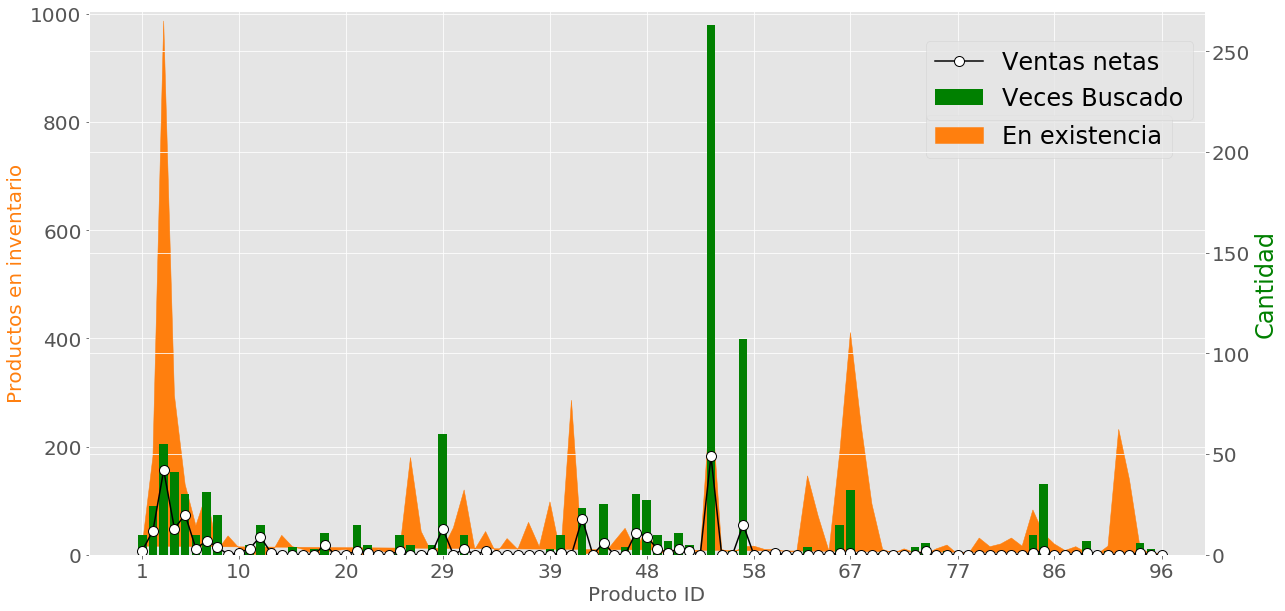

In [16]:
##############################################################
################# Se grafican las búsquedas  #################
##############################################################

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
#plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))

color='tab:orange'
x = [i+1 for i in range(len(pd_products))]
ax1.fill(x, pd_products['stock'], color=color, label='En existencia')
ax1.set_xlabel('Producto ID', fontsize=20)
ax1.set_ylabel('Productos en inventario', fontsize=20, color=color)
ax1.set_xlim(-4, 100)
ax1.set_ylim(0, 1005)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=[.75, .73], fontsize=24)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color='green'
x = [i+1 for i in range(len(pd_products))]
ax2.bar(x, n_busq, color=color, label='Veces Buscado')
ax2.plot(x, n_vent_tot, '-o', color='black', mfc='white', markersize=10, label='Ventas netas')
ax2.set_xlabel('Producto ID', fontsize=20)
ax2.set_ylabel('Cantidad', fontsize=24, color=color)
ax2.set_xlim(-4, 100)
ax2.set_ylim(0, 270)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


nsticks=10
x = np.array([int((len(pd_products)-1)/nsticks*i+1) for i in range(nsticks+1)])
my_xticks = [i for i in x]
plt.xticks(x, my_xticks)
#plt.gcf().autofmt_xdate()

plt.legend(loc=[.75, .8], fontsize=24)